1. Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

file_path = '/content/EastWestAirlines.xlsx'
df = pd.read_excel(file_path, sheet_name='data')

print(df.head())
print(df.isnull().sum())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('ID#', axis=1))

scaled_df = pd.DataFrame(scaled_data, columns=df.columns[1:])
print(scaled_df.head())


   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  
ID#                  0
Balance              0
Qual_miles 

2. Exploratory Data Analysis (EDA)

In [ ]:

sns.pairplot(scaled_df)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm')
plt.show()


3. Implementing Clustering Algorithms

In [ ]:
#K-Means Clustering
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

df['KMeans_Cluster'] = kmeans_labels


In [ ]:
#Hierarchical Clustering
Z = linkage(scaled_df, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

hierarchical_labels = fcluster(Z, t=5, criterion='maxclust')

df['Hierarchical_Cluster'] = hierarchical_labels


In [7]:
#DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)

df['DBSCAN_Cluster'] = dbscan_labels
#Cluster Analysis and Interpretation
print(df.groupby('KMeans_Cluster').mean())
print(df.groupby('Hierarchical_Cluster').mean())
print(df.groupby('DBSCAN_Cluster').mean())


                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               1945.497020   58124.779499  193.427890   1.699642   1.019070   
1               1563.870392  139193.010702  145.376932   4.195006   1.002378   
2               1158.110212   59918.329626   70.803842   1.495450   1.020222   
3               3127.675379   34546.727656   93.012648   1.247049   1.011804   
4               1770.708333  196333.680556  773.805556   2.250000   1.041667   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.000000  10816.562574    10.760429         417.281287   
1                1.057075  51174.633769    20.095125         383.443520   
2                1.001011   6402.407482     8.601618         177.680485   
3                1.000000   4428.688027     6.623946         141

4. visualisation

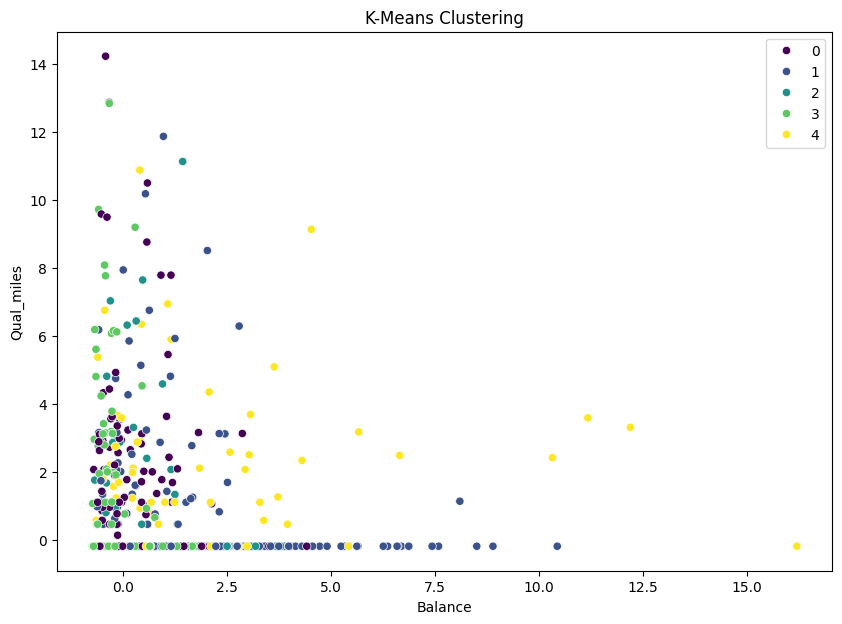

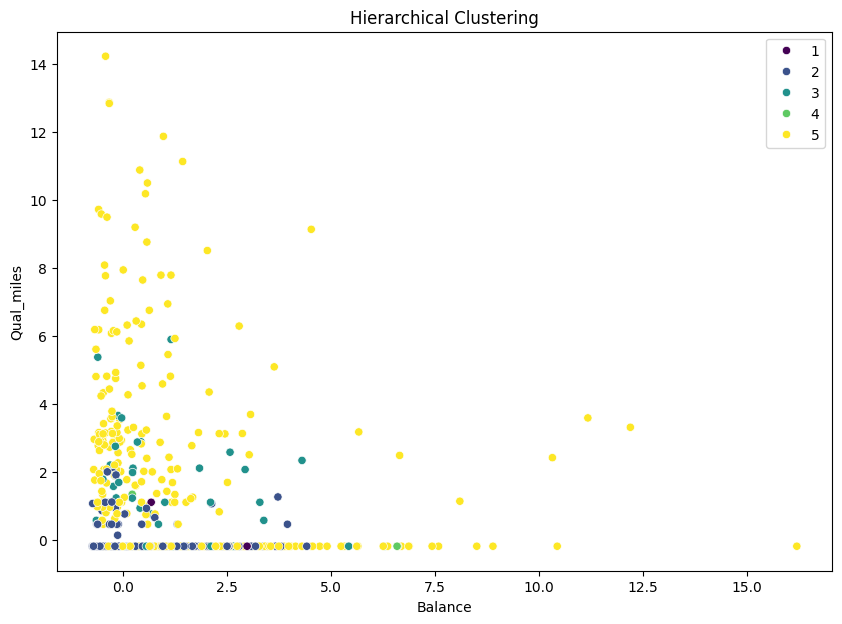

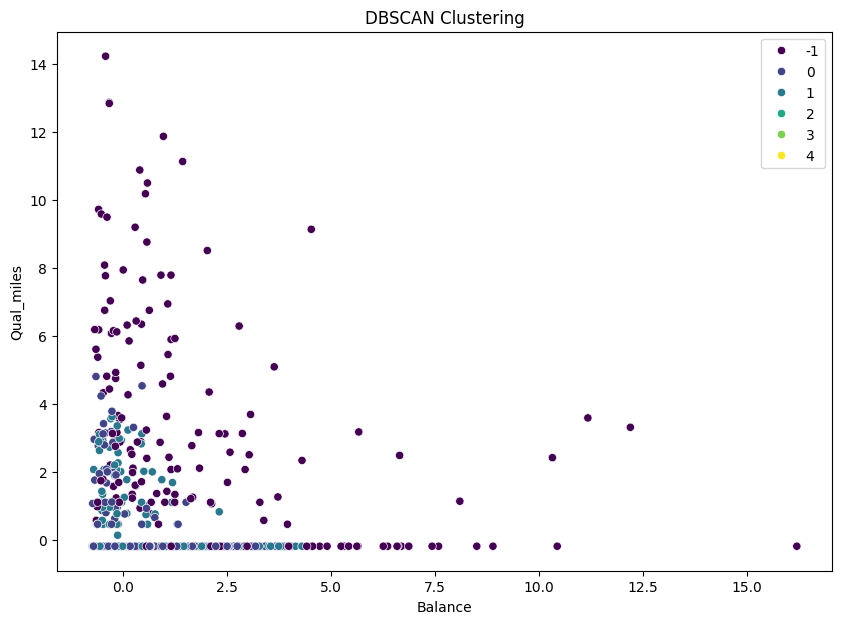

In [8]:
# K-Means Clustering Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_df.iloc[:, 0], y=scaled_df.iloc[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Hierarchical Clustering Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_df.iloc[:, 0], y=scaled_df.iloc[:, 1], hue=hierarchical_labels, palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

# DBSCAN Clustering Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_df.iloc[:, 0], y=scaled_df.iloc[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()



5.  Evaluation and Performance Metrics

In [9]:
# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(scaled_df, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

# Silhouette Score for DBSCAN (if not all points are considered as noise)
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(scaled_df, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
else:
    print('DBSCAN resulted in a single cluster or all points as noise.')


Silhouette Score for K-Means: 0.2005393837499611
Silhouette Score for DBSCAN: 0.253747538041624
